# Chapter 3 - Statistics

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

In [4]:
# Create dataframe
sample_data = {'name': ['John', 'Alia', 'Ananya', 'Steve', 'Ben'], 
               'gender': ['M', 'F', 'F', 'M', 'M'], 
               'communcation_skill_score': [40, 45, 23, 39, 39],
               'quantitative_skill_score': [38, 41, 42, 48, 32]}

data = pd.DataFrame(sample_data, columns = ['name', 'gender', 'communcation_skill_score', 'quantitative_skill_score'])
data.head()

,name,gender,communcation_skill_score,quantitative_skill_score
0,John,M,40,38
1,Alia,F,45,41
2,Ananya,F,23,42
3,Steve,M,39,48
4,Ben,M,39,32


In [5]:
# find mean of communication_skill_score column 
data['communcation_skill_score'].mean(axis=0)

37.2

In [6]:
# find mode of communication_skill_score column
data['communcation_skill_score'].mode()[0]

39

In [7]:
# find median of communication_skill_score column
data['communcation_skill_score'].median()

39.0

In [8]:
column_range=data['communcation_skill_score'].max()-data['communcation_skill_score'].min()
print(column_range)

22


In [9]:
# First Quartile
q1 = data['communcation_skill_score'].quantile(.25)

# Third Quartile
q3 = data['communcation_skill_score'].quantile(.75)

# Inter Quartile Ratio
iqr=q3-q1
print(iqr)

1.0


In [10]:
# Variance of communication_skill_score
data['communcation_skill_score'].var()

69.2

In [11]:
# Standard deviation of communication_skill_score
data['communcation_skill_score'].std()

8.318653737234168

In [12]:
# Describe dataframe
data.describe()

,communcation_skill_score,quantitative_skill_score
count,5.000000,5.000000
mean,37.200000,40.200000
std,8.318654,5.848077
min,23.000000,32.000000
25%,39.000000,38.000000
50%,39.000000,41.000000
75%,40.000000,42.000000
max,45.000000,48.000000


In [13]:
# skewness of communication_skill_score column
data['communcation_skill_score'].skew()

-1.704679180800373

In [14]:
# kurtosis of communication_skill_score column 
data['communcation_skill_score'].kurtosis()

3.6010641852384015

In [15]:
# Calculate and display the covariance between numerical columns of the dataframe
cov_matrix = data[['communcation_skill_score', 'quantitative_skill_score']].cov()
print("\nCovariance between columns:\n", cov_matrix)


Covariance between columns:
                           communcation_skill_score  quantitative_skill_score
communcation_skill_score                     69.20                     -6.55
quantitative_skill_score                     -6.55                     34.20


In [16]:
# Calculate correlation only between the numerical columns
correlation_matrix = data[['communcation_skill_score', 'quantitative_skill_score']].corr(method='pearson')

# Display the correlation matrix
print("\nCorrelation between numerical columns:\n", correlation_matrix)


Correlation between numerical columns:
                           communcation_skill_score  quantitative_skill_score
communcation_skill_score                   1.00000                  -0.13464
quantitative_skill_score                  -0.13464                   1.00000


# Performing Parametric Tests

A **t-test** is a kind of parametric test that is used for checking if there is asignificant difference between the means of the two groups concerned. It is themost commonly used inferential statistic that follows the normal distribution. At-test has two types: a **one-sample t-test** and a **two-sample t-test**.

## One-Sample t-test

A **One-sample ttest** is used for checking if there is a significant difference between a sample andhypothesized population means. Let's take 10 students and check whether theiraverage weight is 68 kg or not by using a t-test, as follows:

In [19]:
from scipy.stats import ttest_1samp

# H0: mu == 68
# Ha: mu > 68 (sample mean = 70.5)

data=np.array([63, 75, 84, 58, 52, 96, 63, 55, 76, 83])

mean_value = np.mean(data)
print("Mean:",mean_value)

t_test_value, p_value = ttest_1samp(data, 68)
print("P Value:",p_value)
print("t-test Value:",t_test_value)
print()

# 0.05 or 5% is significance level or alpha.

if p_value < 0.05:    
    print("p-value < 0.05: Hypothesis Rejected")
else:    
    print("p-value > 0.05: Hypothesis Accepted")

Mean: 70.5
P Value: 0.5986851106160134
t-test Value: 0.545472577903943

p-value > 0.05: Hypothesis Accepted


Mean of the data: 70.5
Calculated t-value: 0.545472577903943
P-value: 0.5986851106160134

p-value > 0.05: Hypothesis Accepted


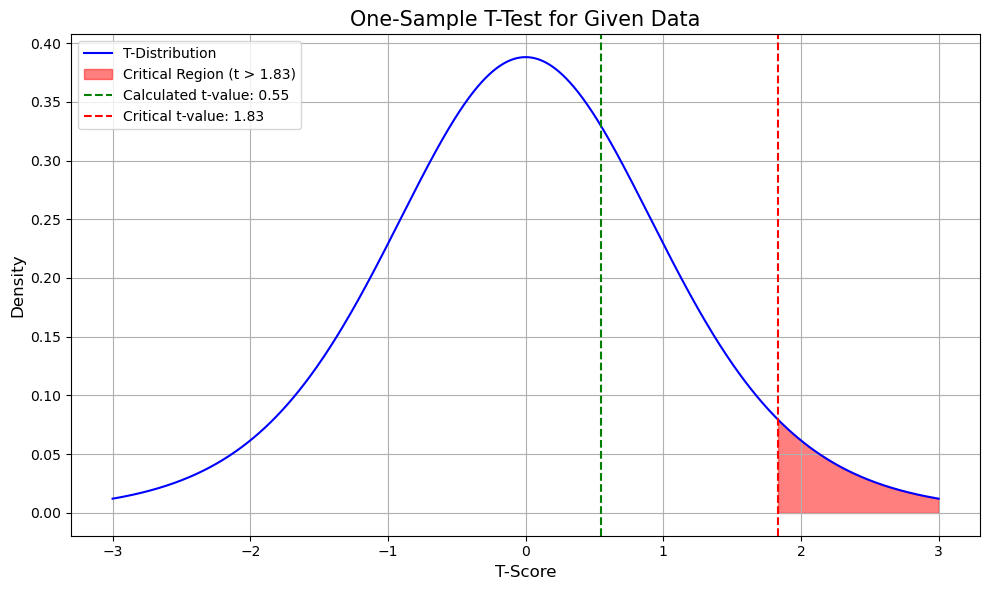

In [20]:
import scipy.stats as stats
from scipy.stats import ttest_1samp

# Given data
data = np.array([63, 75, 84, 58, 52, 96, 63, 55, 76, 83])

# Sample mean and t-test calculation
mean_value = np.mean(data)
t_test_value, p_value = ttest_1samp(data, 68)

# Parameters for t-distribution
alpha = 0.05  # significance level
n = len(data)
df = n - 1  # degrees of freedom
t_critical = stats.t.ppf(1 - alpha, df)

# Print some calculations
print("Mean of the data:", mean_value)
print("Calculated t-value:", t_test_value)
print("P-value:", p_value)
print()
if p_value < 0.05:    
    print("p-value < 0.05: Hypothesis Rejected")
else:    
    print("p-value > 0.05: Hypothesis Accepted")

# Generate values for the t-distribution
x = np.linspace(-3, 3, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="T-Distribution", color='blue')

# Shade the critical region (right tail)
x_fill = np.linspace(t_critical, 3, 1000)
y_fill = stats.t.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Critical Region (t > {t_critical:.2f})')

# Add vertical line for the calculated t-test value
plt.axvline(t_test_value, color='green', linestyle='--', label=f'Calculated t-value: {t_test_value:.2f}')

# Add vertical line for the critical t-value
plt.axvline(t_critical, color='red', linestyle='--', label=f'Critical t-value: {t_critical:.2f}')

# Title and labels
plt.title('One-Sample T-Test for Given Data', fontsize=15)
plt.xlabel('T-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

## 2-Sample T-test

A **Two-sample t-test** is used for comparing the significant difference between two independent groups. This test is also known as an independent samples t-test. Let's compare the average weight of two independent student groups, as follows:

In [22]:
from scipy.stats import ttest_ind

# H0: mu1 == mu2 (Sample means)
# Ha: mu1 > mu2 or mu1 < mu2 


data1 = np.array([63, 75, 84, 58, 52, 96, 63, 55, 76, 83])
data2 = np.array([53, 43, 31, 113, 33, 57, 27, 23, 24, 43])

# Compare samples

stat, p_value = ttest_ind(data1, data2)
print("p-values:",p_value)
print("t-test:",stat)
print()

# 0.05 or 5% is significance level or alpha.

if p_value < 0.05:    
    print("p-value < 0.05: Hypothesis Rejected")
else:    
    print("p-value > 0.05: Hypothesis Accepted")

p-values: 0.01517093136245126
t-test: 2.683587991381918

p-value < 0.05: Hypothesis Rejected


H0 rejected, means are different.

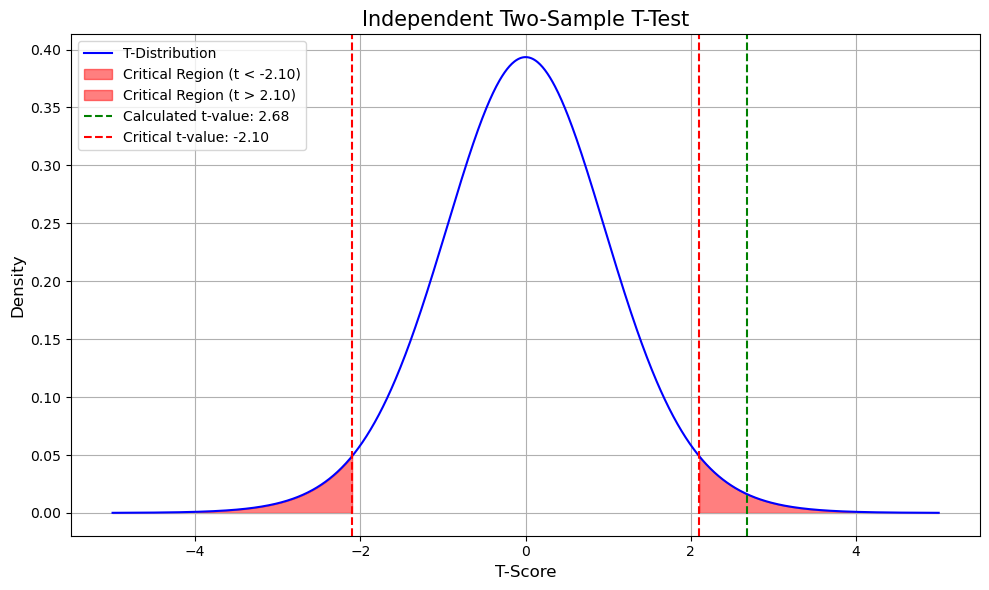

Calculated t-value: 2.683587991381918
p-value: 0.01517093136245126

p-value < 0.05: Hypothesis Rejected


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind

# Given data
data1 = np.array([63, 75, 84, 58, 52, 96, 63, 55, 76, 83])
data2 = np.array([53, 43, 31, 113, 33, 57, 27, 23, 24, 43])

# Perform independent t-test
stat, p_value = ttest_ind(data1, data2)

# Parameters for the t-distribution
alpha = 0.05  # significance level
n1, n2 = len(data1), len(data2)
df = n1 + n2 - 2  # degrees of freedom
t_critical = stats.t.ppf(1 - alpha/2, df)  # two-tailed test

# Generate values for the t-distribution
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="T-Distribution", color='blue')

# Shade the critical regions (both tails)
x_fill_left = np.linspace(-5, -t_critical, 1000)
y_fill_left = stats.t.pdf(x_fill_left, df)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'Critical Region (t < -{t_critical:.2f})')

x_fill_right = np.linspace(t_critical, 5, 1000)
y_fill_right = stats.t.pdf(x_fill_right, df)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5, label=f'Critical Region (t > {t_critical:.2f})')

# Add vertical line for the calculated t-test value
plt.axvline(stat, color='green', linestyle='--', label=f'Calculated t-value: {stat:.2f}')

# Add vertical lines for the critical t-values
plt.axvline(-t_critical, color='red', linestyle='--', label=f'Critical t-value: {-t_critical:.2f}')
plt.axvline(t_critical, color='red', linestyle='--')

# Title and labels
plt.title('Independent Two-Sample T-Test', fontsize=15)
plt.xlabel('T-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Output results
print("Calculated t-value:", stat)
print("p-value:", p_value)
print()

if p_value < 0.05:
    print("p-value < 0.05: Hypothesis Rejected")
else:
    print("p-value > 0.05: Hypothesis Accepted")

## Paired T-test

A **Paired sample t-test** is a dependent sample t-test, which is used to decide whether the mean difference between two observations of the same group is
zero—for example, to compare the difference in blood pressure level for a group of patients before and after some drug treatment. This is equivalent to a onesample t-test and is also known as a dependent sample t-test. 

Let's perform a paired t-test to assess the impact of weight loss treatment. We have collected the weight of patients before and after treatment. This can be represented using the following hypothesis:

    Null Hypothesis, H0: Mean difference between the two dependent samples is 0.
    
    Alternative Hypothesis, Ha: Mean difference between the two dependent samples is not 0.

In [26]:
# paired test
from scipy.stats import ttest_rel

# Weights before treatment
data1=np.array([63, 75, 84, 58, 52, 96, 63, 65, 76, 83])

# Weights after treatment
data2=np.array([53, 43, 67, 59, 48, 57, 65, 58, 64, 72])

# Compare weights

stat, p = ttest_rel(data1, data2)
print("p-values:",p)
print("t-test:",stat)
print()

# 0.05 or 5% is the significance level or alpha.  (It is a 2 tail test, we suppose use alpha/2)

if p < 0.05:      
    print("p < 0.05: Hypothesis Rejected")
else:
    print("p > 0.05: Hypothesis Accepted")

p-values: 0.013685575312467715
t-test: 3.0548295044306903

p < 0.05: Hypothesis Rejected


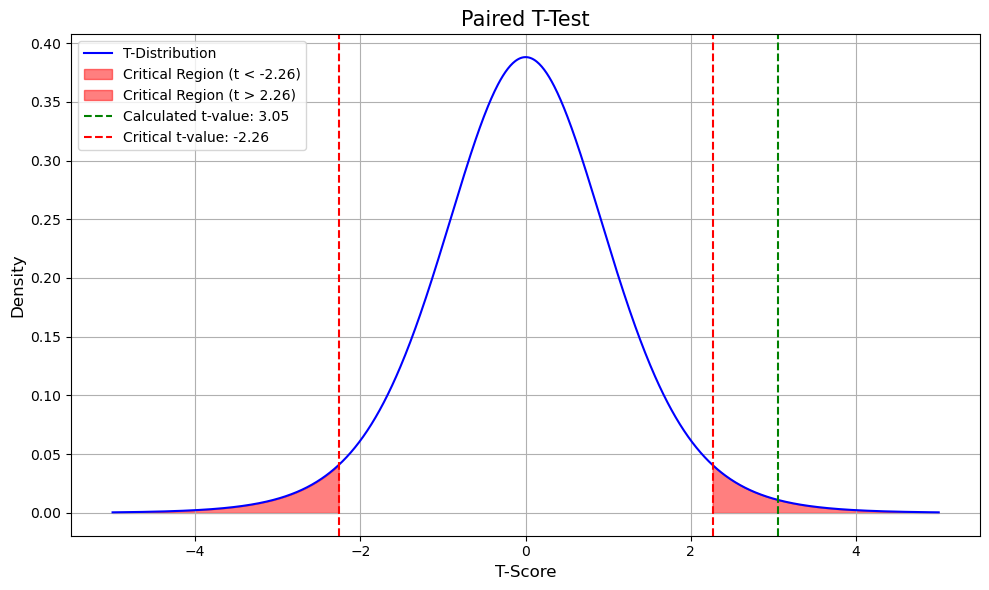

p-value: 0.013685575312467715
Calculated t-value: 3.0548295044306903
p-value < 0.05: Hypothesis Rejected


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_rel

# Weights before treatment
data1 = np.array([63, 75, 84, 58, 52, 96, 63, 65, 76, 83])

# Weights after treatment
data2 = np.array([53, 43, 67, 59, 48, 57, 65, 58, 64, 72])

# Perform paired t-test
stat, p_value = ttest_rel(data1, data2)

# Parameters for the t-distribution
alpha = 0.05  # significance level
n = len(data1)
df = n - 1  # degrees of freedom
t_critical = stats.t.ppf(1 - alpha/2, df)  # two-tailed test

# Generate values for the t-distribution
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="T-Distribution", color='blue')

# Shade the critical regions (both tails)
x_fill_left = np.linspace(-5, -t_critical, 1000)
y_fill_left = stats.t.pdf(x_fill_left, df)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'Critical Region (t < -{t_critical:.2f})')

x_fill_right = np.linspace(t_critical, 5, 1000)
y_fill_right = stats.t.pdf(x_fill_right, df)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5, label=f'Critical Region (t > {t_critical:.2f})')

# Add vertical line for the calculated t-test value
plt.axvline(stat, color='green', linestyle='--', label=f'Calculated t-value: {stat:.2f}')

# Add vertical lines for the critical t-values
plt.axvline(-t_critical, color='red', linestyle='--', label=f'Critical t-value: {-t_critical:.2f}')
plt.axvline(t_critical, color='red', linestyle='--')

# Title and labels
plt.title('Paired T-Test', fontsize=15)
plt.xlabel('T-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Output results
print("p-value:", p_value)
print("Calculated t-value:", stat)

if p_value < 0.05:
    print("p-value < 0.05: Hypothesis Rejected")
else:
    print("p-value > 0.05: Hypothesis Accepted")

# ANOVA

ANOVA: A t-test only deals with two groups, but sometimes we have more than
two groups or multiple groups at the same time to compare. ANOVA (ANalysis
Of VAriance) is a statistical inference test used for comparing multiple groups. It
analyzes the variance between and within multiple groups and tests several null
hypotheses at the same time. It usually compares more than two sets of data and
checks statistical significance. We can use ANOVA in three ways: one-way
ANOVA, two-way ANOVA, and N-way multivariate ANOVA.

## One-Way ANOVA

With the **One-way ANOVA** method, we compare multiple groups based on only one independent variable—for example, an IT company wants to compare
multiple employee groups' or teams' productivity based on performance score. In our example, we are comparing the performance of employees in an IT company based in three locations: Mumbai, Chicago, and London. Here, we will perform a one-way ANOVA test and check for a significant difference in performance. Let's define the null and alternative hypotheses, as follows:

    Null Hypothesis, H0: There is no difference between the mean performance score of multiple locations.
    Alternative Hypothesis, Ha: There is a difference between the mean performance score of multiple locations.

In [31]:
from scipy.stats import f_oneway

# Performance scores of Mumbai location
mumbai = [0.14730927, 0.59168541, 0.85677052, 0.27315387, 0.78591207, 0.52426114, 0.05007655, 0.64405363, 0.9825853, 0.62667439]

# Performance scores of Chicago location
chicago = [0.99140754, 0.76960782, 0.51370154, 0.85041028, 0.19485391, 0.25269917, 0.19925735, 0.80048387, 0.98381235, 0.5864963]

# Performance scores of London location
london = [0.40382226, 0.51613408, 0.39374473, 0.0689976, 0.28035865, 0.56326686, 0.66735357, 0.06786065, 0.21013306, 0.86503358]

# Compare results using Oneway ANOVA
stat, p = f_oneway(mumbai, chicago, london)

print("p-values:", p)
print("F-statistic:", stat)
print()

# Significance level or alpha
alpha = 0.05

# Decision based on p-value
if p < alpha:    
    print("p < 0.05: Hypothesis Rejected (There is a significant difference between groups)")
else:
    print("p > 0.05: Hypothesis Accepted (No significant difference between groups)")

p-values: 0.27667556390705783
F-statistic: 1.3480446381965452

p > 0.05: Hypothesis Accepted (No significant difference between groups)


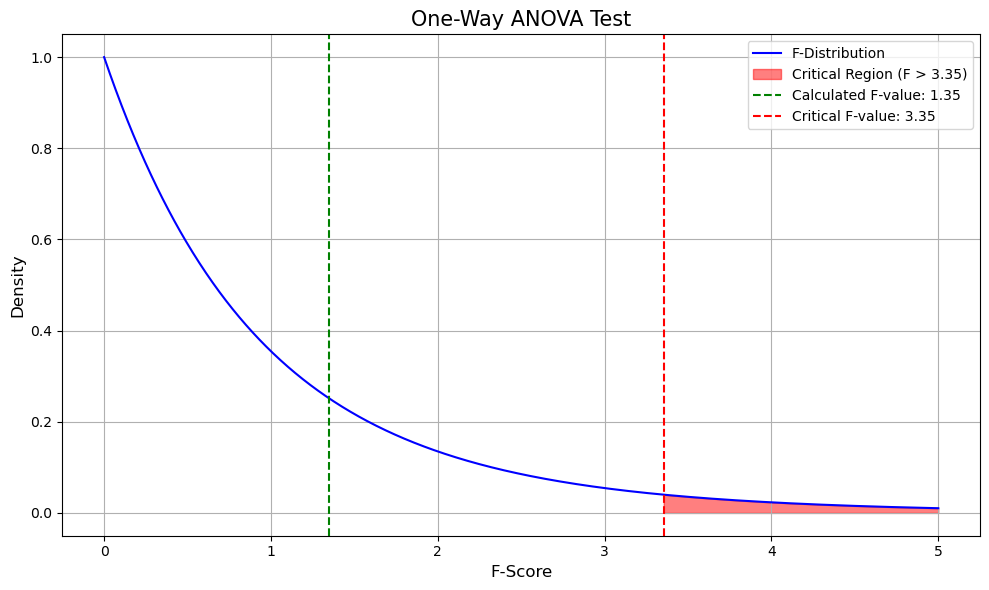

p-value: 0.27667556390705783
Calculated F-value: 1.3480446381965452
Hypothesis Accepted


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway

# Performance scores for different locations
mumbai = [0.14730927, 0.59168541, 0.85677052, 0.27315387, 0.78591207, 0.52426114, 0.05007655, 0.64405363, 0.9825853, 0.62667439]
chicago = [0.99140754, 0.76960782, 0.51370154, 0.85041028, 0.19485391, 0.25269917, 0.19925735, 0.80048387, 0.98381235, 0.5864963]
london = [0.40382226, 0.51613408, 0.39374473, 0.0689976, 0.28035865, 0.56326686, 0.66735357, 0.06786065, 0.21013306, 0.86503358]

# Perform one-way ANOVA
stat, p_value = f_oneway(mumbai, chicago, london)

# Parameters for the F-distribution
alpha = 0.05  # significance level
df_between = 2  # number of groups - 1
df_within = len(mumbai) + len(chicago) + len(london) - 3  # total number of samples - number of groups
f_critical = stats.f.ppf(1 - alpha, df_between, df_within)

# Generate values for the F-distribution
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, df_between, df_within)

# Plot the F-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="F-Distribution", color='blue')

# Shade the critical region (right tail)
x_fill = np.linspace(f_critical, 5, 1000)
y_fill = stats.f.pdf(x_fill, df_between, df_within)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Critical Region (F > {f_critical:.2f})')

# Add vertical line for the calculated F-value
plt.axvline(stat, color='green', linestyle='--', label=f'Calculated F-value: {stat:.2f}')

# Add vertical line for the critical F-value
plt.axvline(f_critical, color='red', linestyle='--', label=f'Critical F-value: {f_critical:.2f}')

# Title and labels
plt.title('One-Way ANOVA Test', fontsize=15)
plt.xlabel('F-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Output results
print("p-value:", p_value)
print("Calculated F-value:", stat)

if p_value < 0.05:
    print("Hypothesis Rejected")
else:
    print("Hypothesis Accepted")

# Non-Parametric Test

## Chi-Square test

A **Chi-Square test** is determined by a significant difference or relationship
between two categorical variables from a single population. In general, this test
assesses whether distributions of categorical variables differ from each other. It is
also known as a Chi-Square goodness of fit test or a Chi-Square test for
independence. A small value of the Chi-Square statistic means observed data fit
with expected data, and a larger value of the Chi-Square statistic means observed
data doesn't fit with expected data. 

**Example**: Suppose we have done a survey in a company of 200 employees and asked about their highest qualification such as High School, Higher Secondary, Graduate, Post-Graduate, and compare it with performance levels such as Average and Outstanding. Here is the hypothesis and contingency criteria:

    Null Hypothesis H0: The two categorical variables are independent—that is, employee performance is independent of the highest qualification level.
    
    Alternative Hypothesis Ha: The two categorical variables are not independent—that is, employee performance is not independent of the highest qualification level.

The contingency table can be represented as follows:

                 High School       Higher Secondary       Graduate          Post-Graduate
    Average           20                 16                  13                   7
    Outstanding       31                 40                  50                  13

In [37]:
from scipy.stats import chi2_contingency

# Average performing employees
average=[20, 16, 13, 7]

# Outstanding performing employees
outstanding=[31, 40, 60, 13]

# contingency table
contingency_table= [average, outstanding]

# Apply Test
stat, p, dof, expected = chi2_contingency(contingency_table)

print("p-values:",p)

if p < 0.05:
   print("Hypothesis Rejected")
else:
   print("Hypothesis Accepted")

p-values: 0.059155602774381234
Hypothesis Accepted


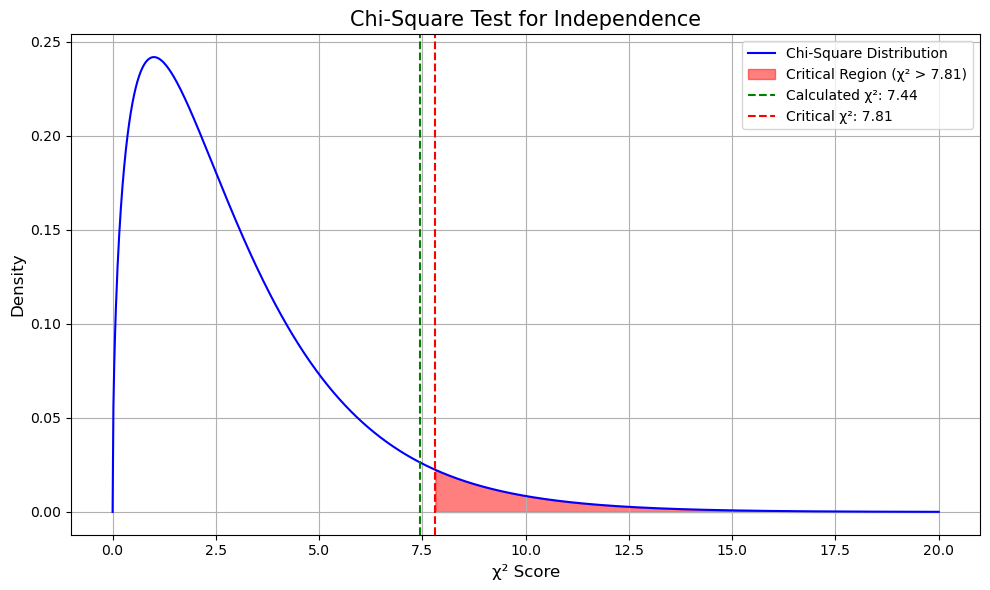

p-value: 0.059155602774381234
Calculated χ²: 7.438662299013974
Degrees of freedom: 3
Expected frequencies:
 [[14.28 15.68 20.44  5.6 ]
 [36.72 40.32 52.56 14.4 ]]

p > 0.05: Hypothesis Accepted


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2

# Average performing employees
average = [20, 16, 13, 7]

# Outstanding performing employees
outstanding = [31, 40, 60, 13]

# Contingency table
contingency_table = [average, outstanding]

# Apply Chi-Square Test
stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Significance level
alpha = 0.05

# Calculate the critical value
critical_value = chi2.ppf(1 - alpha, dof)

# Generate values for the Chi-Square distribution
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, dof)

# Plot the Chi-Square distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Chi-Square Distribution", color='blue')

# Shade the critical region (right tail)
x_fill = np.linspace(critical_value, 20, 1000)
y_fill = chi2.pdf(x_fill, dof)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Critical Region (χ² > {critical_value:.2f})')

# Add vertical line for the calculated Chi-Square test statistic
plt.axvline(stat, color='green', linestyle='--', label=f'Calculated χ²: {stat:.2f}')

# Add vertical line for the critical value
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical χ²: {critical_value:.2f}')

# Title and labels
plt.title('Chi-Square Test for Independence', fontsize=15)
plt.xlabel('χ² Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the test results
print("p-value:", p_value)
print("Calculated χ²:", stat)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
print()

if p_value < 0.05:
    print("p < 0.05: Hypothesis Rejected")
else:
    print("p > 0.05: Hypothesis Accepted")

We have tested the hypothesis that employee
performance is independent of the highest qualification level. The preceding
results show that the null hypothesis is accepted with a 95% confidence interval,
which means that employee performance is independent of the highest
qualification level.

## Mann-Whitney U-test 
The **Mann-Whitney** U test is the non-parametric counterpart of the t-test for twosamples. It doesn't assume that the difference between the samples is normallydistributed. The Mann-Whitney U test is used when the observation is ordinaland assumptions of the t-test were not met—for example, comparing two groupsof movie test preferences from their given movie ratings.

Let's compare two groups of movie ratings using the following criteria:

    Null Hypothesis, H0: There is no difference between the two sample distributions.
    
    Alternative Hypothesis, Ha: There is a difference between the two sample distributions

In [42]:
from scipy.stats import mannwhitneyu

# Sample1
data1=[7,8,4,9,8]

# Sample2
data2=[3,4,2,1,1]

# Apply Test
stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
print("p-values:",p)
print()

# 0.01 or 1% is significance level or alpha.

if p  < 0.01:    
    print("Hypothesis Rejected")
else:
    print("Hypothesis Accepted")

p-values: 0.015333162113602824

Hypothesis Accepted


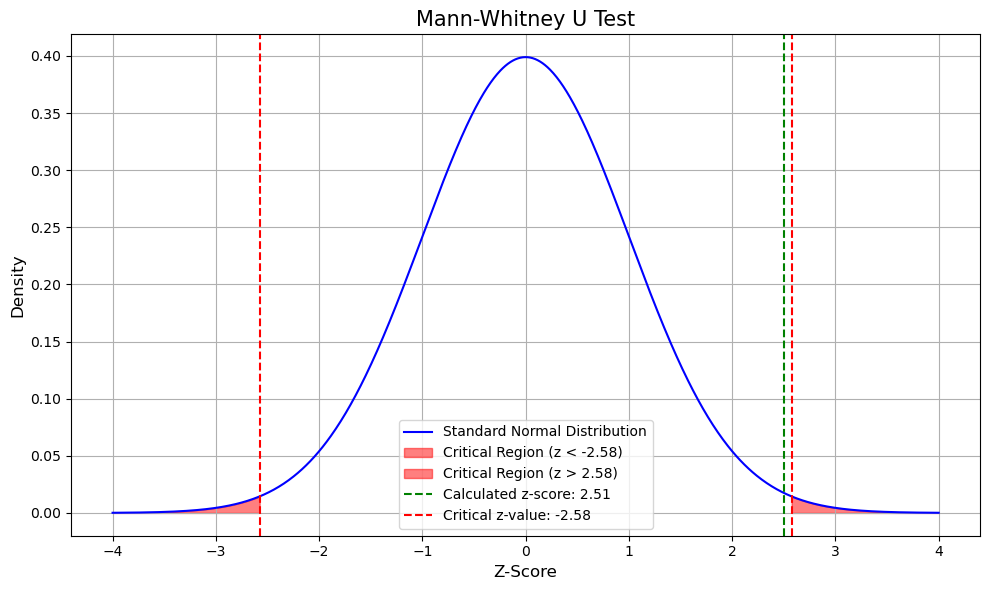

p-value: 0.015333162113602824
Calculated U statistic: 24.5
Calculated z-score: 2.5067182457620487
p > 0.01: Hypothesis Accepted


In [43]:
from scipy.stats import mannwhitneyu, norm

# Sample data
data1 = [7, 8, 4, 9, 8]
data2 = [3, 4, 2, 1, 1]

# Apply Mann-Whitney U Test
stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

# Significance level
alpha = 0.01

# Calculate mean and standard deviation for the U statistic
n1 = len(data1)
n2 = len(data2)
mean_U = n1 * n2 / 2
std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# Convert the U statistic to a z-score for normal distribution
z = (stat - mean_U) / std_U

# Calculate the critical value (two-tailed)
z_critical = norm.ppf(1 - alpha / 2)

# Generate values for the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Plot the normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# Shade the critical regions (both tails)
x_fill_left = np.linspace(-4, -z_critical, 1000)
y_fill_left = norm.pdf(x_fill_left)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'Critical Region (z < -{z_critical:.2f})')

x_fill_right = np.linspace(z_critical, 4, 1000)
y_fill_right = norm.pdf(x_fill_right)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5, label=f'Critical Region (z > {z_critical:.2f})')

# Add vertical line for the calculated z-score
plt.axvline(z, color='green', linestyle='--', label=f'Calculated z-score: {z:.2f}')

# Add vertical lines for the critical z-values
plt.axvline(-z_critical, color='red', linestyle='--', label=f'Critical z-value: {-z_critical:.2f}')
plt.axvline(z_critical, color='red', linestyle='--')

# Title and labels
plt.title('Mann-Whitney U Test', fontsize=15)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the test results
print("p-value:", p_value)
print("Calculated U statistic:", stat)
print("Calculated z-score:", z)

if p_value < 0.01:
    print("p < 0.01: Hypothesis Rejected")
else:
    print("p > 0.01: Hypothesis Accepted")

## Wilcoxon Rank Test

The **Wilcoxon signed-rank test** compares two paired samples. It is a nonparametric counterpart version of the paired t-test. It tests the null hypothesis as to whether the two paired samples belong to the same distribution or not—for example, to compare the difference between two treatment observations for multiple groups. 

Let's compare the difference between two treatment observations using the following criteria:

    Null Hypothesis, H0: There is no difference between the dependent sample distributions.
    
    Alternative Hypothesis, Ha: There is a difference between the dependent sample distributions.

In [45]:
from scipy.stats import wilcoxon

data1 = [1, 3, 5, 7, 9]   # Sample-1
data2 = [2, 4, 6, 8, 10]  # Sample-2 after treatement 

# Apply 
stat, p = wilcoxon(data1, data2, zero_method='wilcox')  # Using 'zero_method='wilcox' for small sample sizes

print("p-values:",p)

# 0.01 or 1% is significance level or alpha.

if p  < 0.01:    
    print("Hypothesis Rejected")
else:
    print("Hypothesis Accepted")

p-values: 0.0625
Hypothesis Accepted


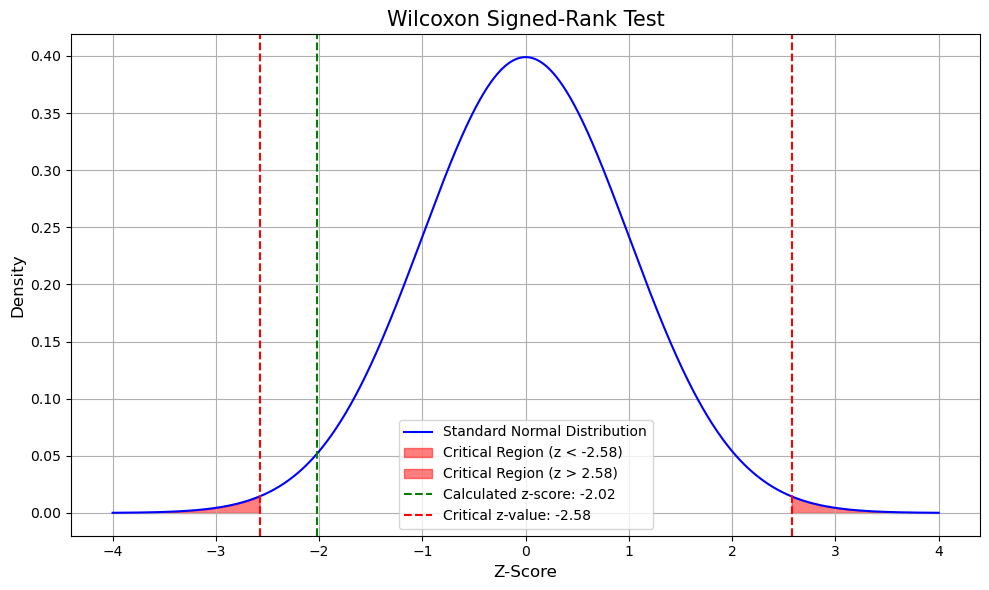

p-value: 0.0625
Calculated Wilcoxon statistic: 0.0
Calculated z-score: -2.0225995873897262
p > 0.01: Hypothesis Accepted


In [46]:
from scipy.stats import wilcoxon, norm

# Given data
data1 = [1, 3, 5, 7, 9]   # Sample-1
data2 = [2, 4, 6, 8, 10]  # Sample-2 after treatment

# Apply Wilcoxon signed-rank test
stat, p_value = wilcoxon(data1, data2, zero_method='wilcox')

# Calculate the z-score for the Wilcoxon test statistic
n = len(data1)  # Number of pairs
mean_W = n * (n + 1) / 4  # Mean of the Wilcoxon statistic
std_W = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)  # Standard deviation of the Wilcoxon statistic
z = (stat - mean_W) / std_W  # Z-score

# Significance level (alpha)
alpha = 0.01

# Critical z-value for a two-tailed test
z_critical = norm.ppf(1 - alpha / 2)

# Generate values for the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Plot the normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# Shade the critical regions (both tails)
x_fill_left = np.linspace(-4, -z_critical, 1000)
y_fill_left = norm.pdf(x_fill_left)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.5, label=f'Critical Region (z < -{z_critical:.2f})')

x_fill_right = np.linspace(z_critical, 4, 1000)
y_fill_right = norm.pdf(x_fill_right)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.5, label=f'Critical Region (z > {z_critical:.2f})')

# Add vertical line for the calculated z-score
plt.axvline(z, color='green', linestyle='--', label=f'Calculated z-score: {z:.2f}')

# Add vertical lines for the critical z-values
plt.axvline(-z_critical, color='red', linestyle='--', label=f'Critical z-value: {-z_critical:.2f}')
plt.axvline(z_critical, color='red', linestyle='--')

# Title and labels
plt.title('Wilcoxon Signed-Rank Test', fontsize=15)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the test results
print("p-value:", p_value)
print("Calculated Wilcoxon statistic:", stat)
print("Calculated z-score:", z)

if p_value < 0.01:
    print("p < 0.01: Hypothesis Rejected")
else:
    print("p > 0.01: Hypothesis Accepted")

In the preceding code block, we have tested the hypothesis that there is
no difference between the distribution of groups before and after treatment using
the wilcoxon() method. The preceding results show that the null hypothesis is
accepted with a 99% confidence interval, which means that there is no significant
difference between the groups before and after treatment.

## Kruskal–Wallis Test

The **Kruskal-Wallis test** is the non-parametric version of **one-way ANOVA**, toassess whether samples belong to the same distribution or not. It compares twoor more independent samples. It extends the limit of the **Mann-Whitney U test**,which compares only two groups. Let's compare three sample groups using thefollowing code:

In [49]:
from scipy.stats import kruskal

# Data sample-1
x = [38, 18, 39, 83, 15, 38, 63,  1, 34, 50]

# Data sample-2
y = [78, 32, 58, 59, 74, 77, 29, 77, 54, 59]

# Data sample-3
z = [117,  92,  42,  79,  58, 117,  46, 114,  86,  26]

# Apply kruskal-wallis test
stat, p = kruskal(x,y,z)
print("p-values:",p)

# 0.01 or 1% is significance level or alpha.

if p  < 0.01:    
    print("Hypothesis Rejected")
else:
    print("Hypothesis Accepted")

p-values: 0.01997922369138151
Hypothesis Accepted


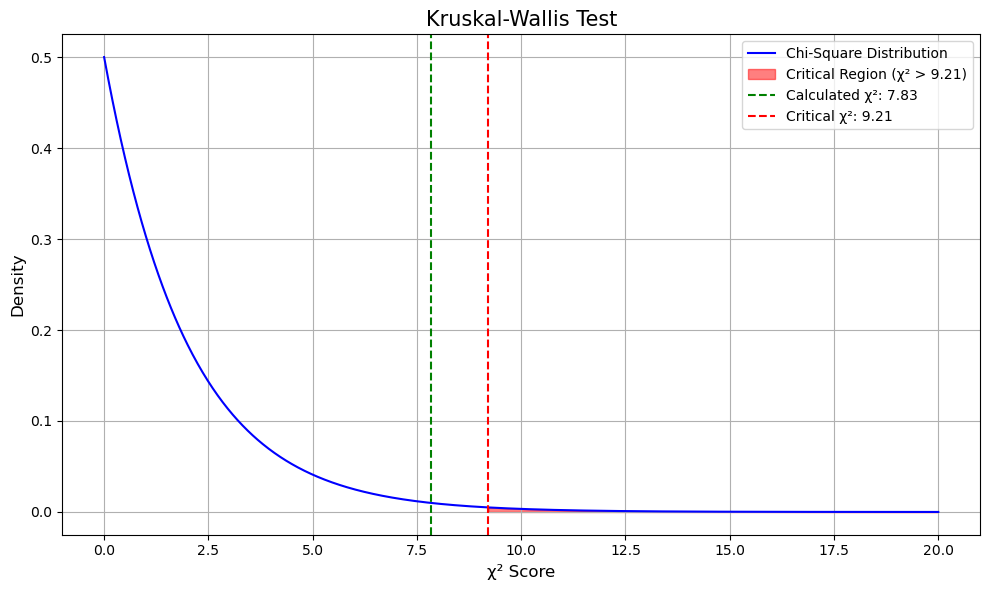

p-value: 0.01997922369138151
Calculated χ²: 7.826124721603573
Degrees of freedom: 2
p > 0.01: Hypothesis Accepted


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal, chi2

# Data sample-1
x = [38, 18, 39, 83, 15, 38, 63, 1, 34, 50]

# Data sample-2
y = [78, 32, 58, 59, 74, 77, 29, 77, 54, 59]

# Data sample-3
z = [117, 92, 42, 79, 58, 117, 46, 114, 86, 26]

# Apply Kruskal-Wallis test
stat, p_value = kruskal(x, y, z)

# Degrees of freedom
k = 3  # Number of groups
df = k - 1  # Degrees of freedom for the chi-square distribution

# Significance level (alpha)
alpha = 0.01

# Critical chi-square value
critical_value = chi2.ppf(1 - alpha, df)

# Generate values for the Chi-Square distribution
x_vals = np.linspace(0, 20, 1000)
y_vals = chi2.pdf(x_vals, df)

# Plot the Chi-Square distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="Chi-Square Distribution", color='blue')

# Shade the critical region (right tail)
x_fill = np.linspace(critical_value, 20, 1000)
y_fill = chi2.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Critical Region (χ² > {critical_value:.2f})')

# Add vertical line for the calculated Kruskal-Wallis test statistic
plt.axvline(stat, color='green', linestyle='--', label=f'Calculated χ²: {stat:.2f}')

# Add vertical line for the critical chi-square value
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical χ²: {critical_value:.2f}')

# Title and labels
plt.title('Kruskal-Wallis Test', fontsize=15)
plt.xlabel('χ² Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the test results
print("p-value:", p_value)
print("Calculated χ²:", stat)
print("Degrees of freedom:", df)

if p_value < 0.01:
    print("p < 0.01: Hypothesis Rejected")
else:
    print("p > 0.01: Hypothesis Accepted")

The preceding results show that the null hypothesis is accepted with a 99% confidence interval, which means that there is no difference between the three sample groups.

# Comparison Between Tests

| Features | Parametric Tests | Non-Parametric Tests |
|:---------|:--------:|---------:|
|  Test Statistic   |  Distribution   |  Arbitrary or Distribution-Free   |
|  Attribute Type   |  Numeric   |  Nominal and Ordinal   |
|  Central Tendency Measures   |  Mean   |  Median   |
|  Correlation Tests   |  Pearson's Correlation   |  Spearman's Correlation   |
|  Information about Population   |  Complete Information   |  No Information   |